In [1]:
%matplotlib inline  

In [2]:
# NumPy
#import numpy as np
#from scipy.signal import convolve2d

# JAX
import jax.numpy as np
from jax.scipy.signal import convolve2d

# The rest
from matplotlib import pyplot as plt
from skimage.io import imread, imsave
from skimage.util import img_as_float32, img_as_ubyte, random_noise

Do not forget to upload the image before you load it in the code. In Google Colab you can use the "Files" section at the left part of the window.

In [4]:
img = imread('The_Cat.jpg')

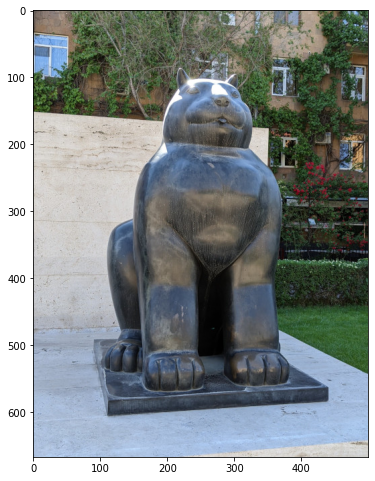

In [28]:
plt.figure(figsize = (6, 10))
plt.imshow(img)

In [6]:
type(img)

numpy.ndarray

In [7]:
#img = np.asarray(img)

In [8]:
type(img)

numpy.ndarray

In [9]:
img.ndim

3

In [10]:
img.shape

(667, 500, 3)

In [11]:
img.dtype

dtype('uint8')

In [12]:
img.size

1000500

In [13]:
img.nbytes

1000500

In [14]:
ca = img.astype(np.float32)

In [15]:
ca.nbytes

4002000

In [16]:
ca.size

1000500

In [17]:
cat_face = img[80:220, 190:330, 1]

In [18]:
cat_face.shape

(140, 140)

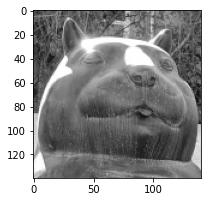

In [19]:
plt.figure(figsize = (3,4))
plt.imshow(cat_face, cmap='gray')

In [20]:
img.min(), img.max()

(0, 255)

In [21]:
# https://scikit-image.org/docs/stable/user_guide/data_types.html
# 
img = img_as_float32(img)

In [22]:
img.dtype

dtype('float32')

In [23]:
img.min(), img.max()

(0.0, 1.0)

In [ ]:
img = img[:,::-1,:] # or can use flip() https://numpy.org/doc/stable/reference/generated/numpy.flip.html

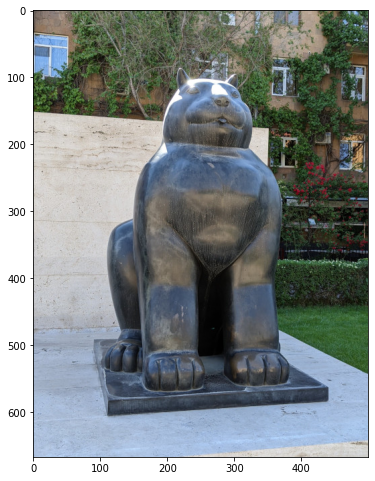

In [29]:
plt.figure(figsize = (6, 10))
plt.imshow(img)

In [40]:
# https://scikit-image.org/docs/stable/api/skimage.util.html#random-noise
img_noised = random_noise(img, mode='gaussian')

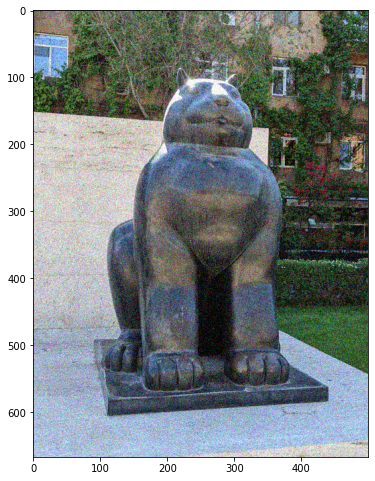

In [41]:
plt.figure(figsize = (6, 10))
plt.imshow(img_noised)

In [38]:
# python s&p https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv
# https://gist.github.com/Prasad9/28f6a2df8e8d463c6ddd040f4f6a028a
img_noised = random_noise(img, mode='s&p', amount=0.1)

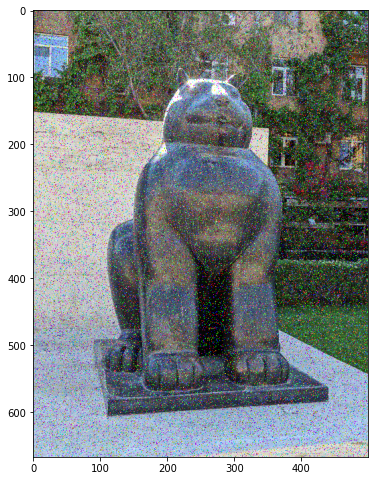

In [39]:
plt.figure(figsize = (6,10))
plt.imshow(img_noised)

In [33]:
# https://numpy.org/doc/stable/reference/generated/numpy.rot90.html
#img = np.rot90(img, k=2, axes=(0, 1)) 

In [34]:
# some links
# https://songhuiming.github.io/pages/2017/04/16/convolve-correlate-and-image-process-in-numpy/
# https://docs.gimp.org/2.6/en/plug-in-convmatrix.html

In [35]:
kernel_blur = np.ones((5,5))
kernel_blur /= np.sum(kernel_blur)

In [36]:
kernel_blur

DeviceArray([[0.04, 0.04, 0.04, 0.04, 0.04],
             [0.04, 0.04, 0.04, 0.04, 0.04],
             [0.04, 0.04, 0.04, 0.04, 0.04],
             [0.04, 0.04, 0.04, 0.04, 0.04],
             [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [37]:
type(kernel_blur)

jaxlib.xla_extension.DeviceArray

In [42]:
# https://github.com/TheAlgorithms/Python/blob/master/digital_image_processing/filters/gaussian_filter.py
# https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
# https://en.wikipedia.org/wiki/Gaussian_blur

def gaussian_kernel(kernel_size, sigma=1.0, mu=0.0):
    center = kernel_size // 2
    x, y = np.mgrid[-center : kernel_size - center, -center : kernel_size - center]
    d = np.sqrt(np.square(x) + np.square(y))
    koeff = 1 / (2 * np.pi * np.square(sigma))
    kernel = koeff * np.exp(-np.square(d-mu) / (2 * np.square(sigma)))
    return kernel

In [43]:
kernel_gauss = gaussian_kernel(5)
kernel_gauss

DeviceArray([[0.00291502, 0.01306424, 0.02153928, 0.01306424, 0.00291502],
             [0.01306424, 0.05854984, 0.09653235, 0.05854984, 0.01306424],
             [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
             [0.01306424, 0.05854984, 0.09653235, 0.05854984, 0.01306424],
             [0.00291502, 0.01306424, 0.02153928, 0.01306424, 0.00291502]],            dtype=float32)

In [44]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d

In [45]:
def color_convolution(image, kernel):
  channels = []
  for i in range(3):
    color_channel = image[:,:,i]
    filtered_channel = convolve2d(color_channel, kernel, mode="same") #, boundary="symm")
    filtered_channel = np.clip(filtered_channel, 0.0, 1.0)
    channels.append(filtered_channel)
  final_image = np.stack(channels, axis=2) #.astype('uint8')
  return final_image

In [46]:
img_blur = color_convolution(img_noised, kernel_gauss)

In [47]:
type(img_blur)

jaxlib.xla_extension.DeviceArray

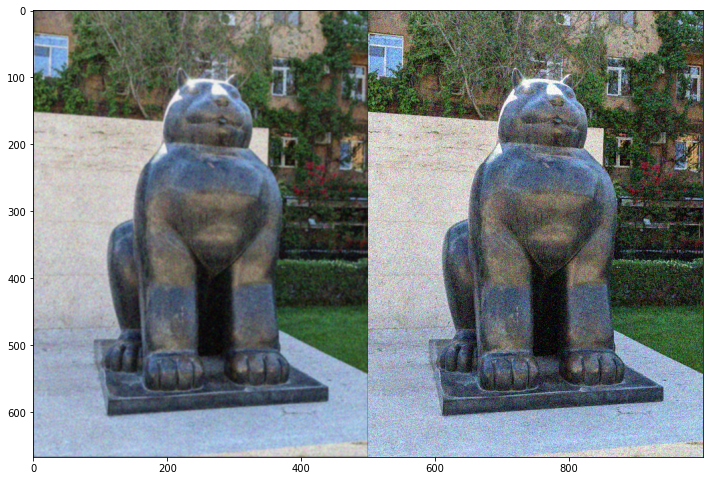

In [48]:
plt.figure(figsize = (12,10))
plt.imshow(np.hstack((img_blur, img_noised)))

In [49]:
# https://eeweb.engineering.nyu.edu/~yao/EE3414/image_filtering.pdf
# https://songhuiming.github.io/pages/2017/04/16/convolve-correlate-and-image-process-in-numpy/
# https://docs.gimp.org/2.6/en/plug-in-convmatrix.html

In [50]:
kernel_sharpen = np.array(
    [[-1, -1, -1, -1, -1],
     [-1, -1, -1, -1, -1],
     [-1, -1, 50, -1, -1],
     [-1, -1, -1, -1, -1],
     [-1, -1, -1, -1, -1]], dtype=np.float32
)
kernel_sharpen /= np.sum(kernel_sharpen)

In [51]:
kernel_sharpen = np.array(
    [[-1,-1,-1],
     [-1,16,-1],
     [-1,-1,-1]], dtype=np.float32
)
kernel_sharpen /= np.sum(kernel_sharpen)

In [52]:
kernel_sharpen

DeviceArray([[-0.125, -0.125, -0.125],
             [-0.125,  2.   , -0.125],
             [-0.125, -0.125, -0.125]], dtype=float32)

In [53]:
img_restored = color_convolution(img_blur, kernel_sharpen)

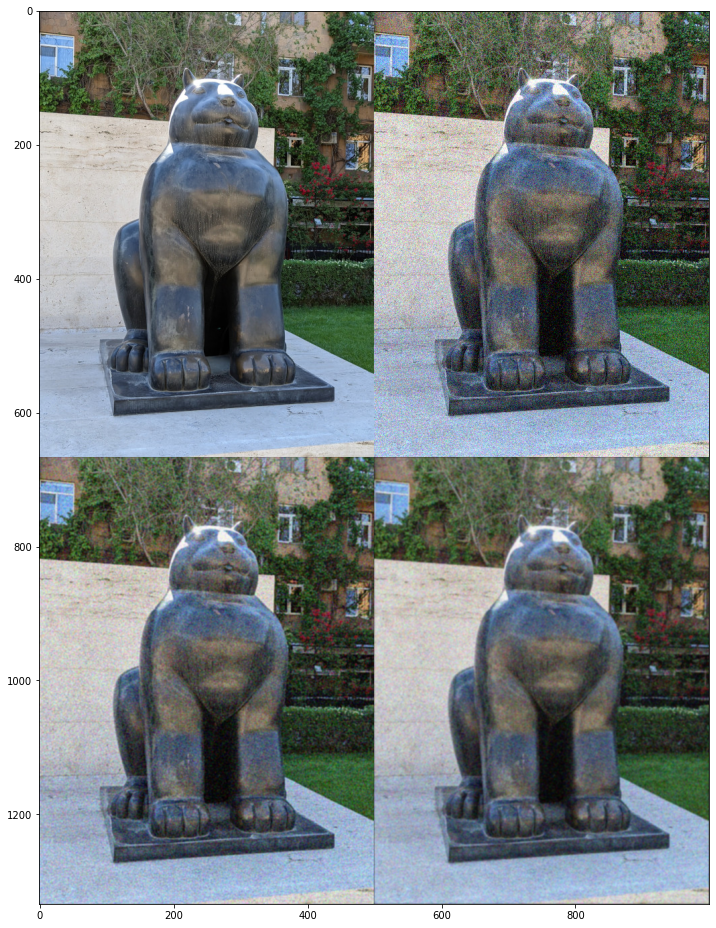

In [54]:
plt.figure(figsize = (12,20))
plt.imshow(np.vstack(
    (np.hstack((img, img_noised)),
    np.hstack((img_restored, img_blur)))
))

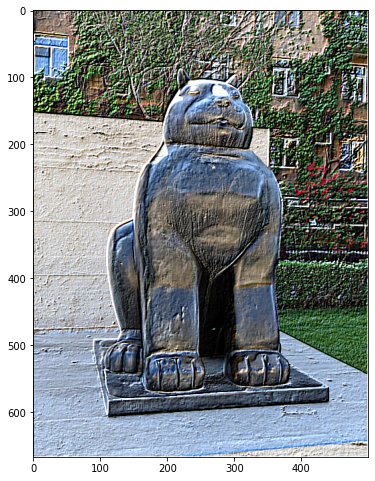

In [55]:
kernel_emboss = np.array(
    [[-2,-1, 0],
     [-1, 1, 1],
     [0,  1, 2]]
)
img_emboss = color_convolution(img, kernel_emboss)
plt.figure(figsize = (6,10))
plt.imshow(img_emboss)

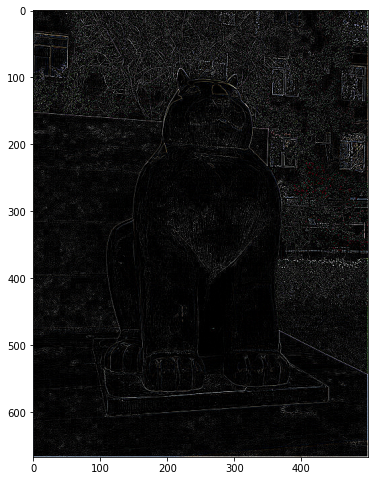

In [56]:
kernel_edge = np.array(
    [[0,-1,0],
     [-1,4,-1],
     [0,-1,0]], dtype=np.float32
)
img_edge = color_convolution(img, kernel_edge)
plt.figure(figsize = (6,10))
plt.imshow(img_edge)

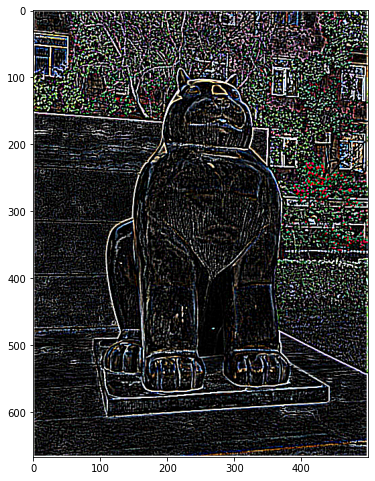

In [57]:
kernel_custom = np.array(
    [[-1, -1, -1, -1, -1],
    [-1,  1,  2,  1, -1],
    [-1,  2,  4,  2, -1],
    [-1,  1,  2,  1, -1],
    [-1, -1, -1, -1, -1]]
)
img_edge = color_convolution(img, kernel_custom)
plt.figure(figsize = (6,10))
plt.imshow(img_edge)

In [58]:
img_edge.shape

(667, 500, 3)

In [59]:
img_edge

DeviceArray([[[1.        , 1.        , 1.        ],
              [1.        , 1.        , 1.        ],
              [1.        , 1.        , 1.        ],
              ...,
              [0.6156862 , 0.984314  , 0.49019614],
              [1.        , 1.        , 1.        ],
              [1.        , 1.        , 1.        ]],

             [[1.        , 1.        , 1.        ],
              [1.        , 1.        , 1.        ],
              [1.        , 1.        , 1.        ],
              ...,
              [0.47843125, 1.        , 0.35294124],
              [1.        , 1.        , 1.        ],
              [1.        , 1.        , 1.        ]],

             [[0.83529425, 0.8       , 0.76078427],
              [1.        , 1.        , 1.        ],
              [0.29411763, 0.29019615, 0.3176467 ],
              ...,
              [0.        , 0.        , 0.        ],
              [0.90588236, 1.        , 0.84705865],
              [1.        , 1.        , 1.        ]],

 

In [60]:
image_modified = img_as_ubyte(img_edge)

In [61]:
imsave('The_Cat_modified.jpg', arr=image_modified)

In [62]:
image_modified

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [157, 251, 125],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [122, 255,  90],
        [255, 255, 255],
        [255, 255, 255]],

       [[213, 204, 194],
        [255, 255, 255],
        [ 75,  74,  81],
        ...,
        [  0,   0,   0],
        [231, 255, 216],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]